# Credit Card Transaction Fraud Detection
## How can advanced machine learning help auditors?

## Table of Contents
- Setup
- Loading the Data
- Exploration of the Data
- AutoEncoders
- Preparing the Data
- Building the Model
- Evaluation

## Setup

We need to load the required packages for the analysis.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Loading the Data

The datasets contains transactions made by credit cards in __September 2013__ by __European__ cardholders. This dataset presents transactions that occurred in two days, where we have `492` frauds out of `284,807` transactions. The dataset is highly unbalanced, the positive class (_fraud_s) account for __0.172%__ of all transactions.

In [3]:
creditData = pd.read_csv("./creditcard.csv") 
#creditData.describe()
creditData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploring the Data

Let's look at what data are we dealing with.

In [4]:
creditData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Do we have any missing data?

In [5]:
creditData.isnull().values.any()

False

### How much fraud data are we dealing with?

Text(0, 0.5, 'Frequency')

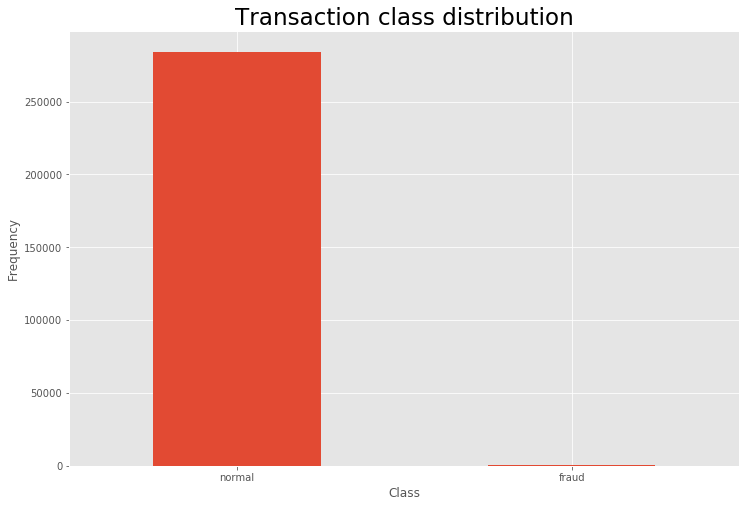

In [6]:
labels = ['normal','fraud']
classes = pd.value_counts(creditData['Class'], sort = True)
classes.plot(kind = 'bar', rot=0, log=False, figsize=(12,8))
plt.rcParams.update({'font.size': 16})
plt.title('Transaction class distribution')
plt.xticks(range(2), labels)
plt.xlabel('Class')
plt.ylabel('Frequency')

### Is amount of transaction a good indicator?

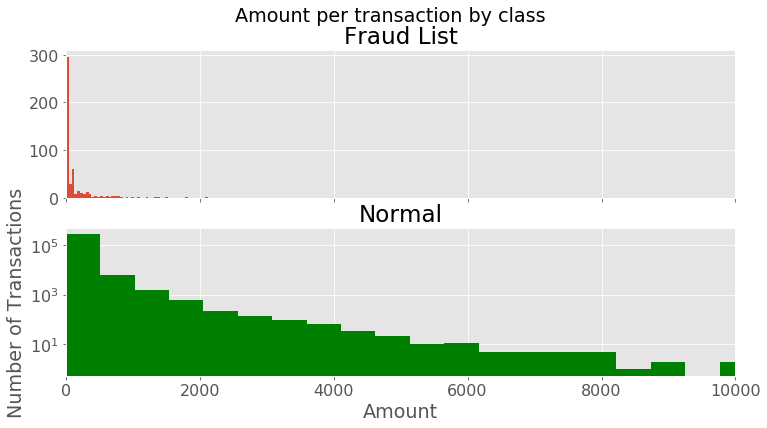

In [7]:
fraud = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
# Amount vs Class

f, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(12, 6))
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount, bins = 50)
ax1.set_title('Fraud List')
ax2.hist(normal.Amount, bins = 50, color='green')
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show()

### Does amount change over time?

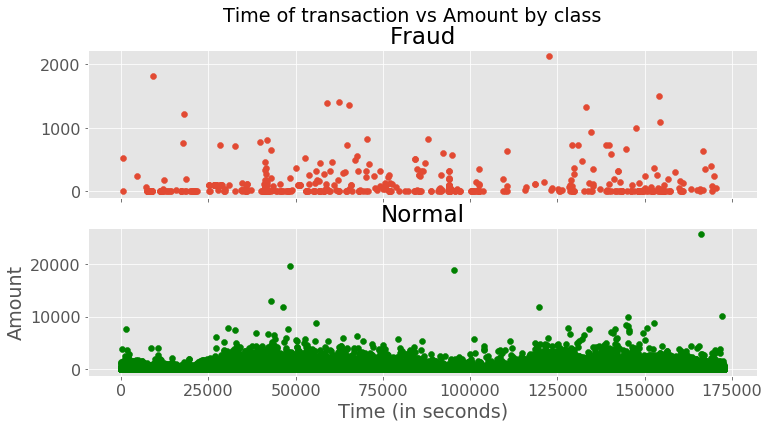

In [8]:
# time vs Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount, color='green')
ax2.set_title('Normal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

### Can we find different patterns of fraud and normal groups?

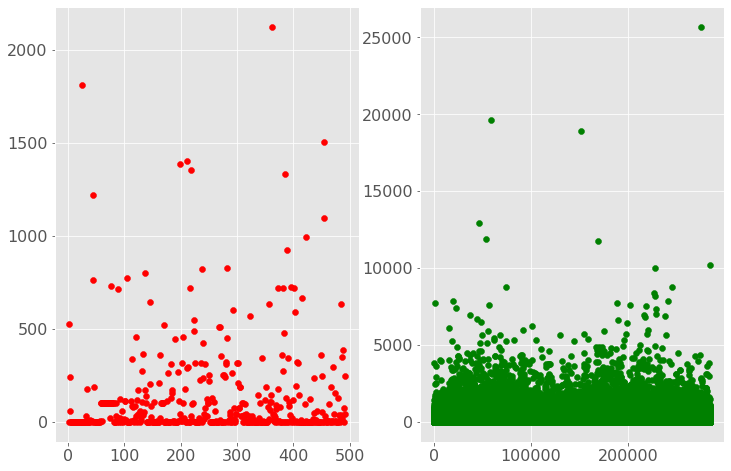

In [9]:
#plotting the dataset considering the class
color = {1:'red', 0:'yellow'}
fraudlist = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
fig,axes = plt.subplots(1,2, figsize=(12, 8))
axes[0].scatter(list(range(1,fraudlist.shape[0] + 1)), fraudlist.Amount,color='red')
axes[1].scatter(list(range(1, normal.shape[0] + 1)), normal.Amount,color='green')
plt.show()


## Autoencoder
Autoencoders can seem quite bizarre at first. The job of those models is to predict the input, given that same input. Puzzling? Definitely was for me, the first time I heard it.

More specifically, let’s take a look at Autoencoder Neural Networks. This autoencoder tries to learn to approximate the following identity function:

$$f_{w,b}(x) \approx x $$

While trying to do just that might sound trivial at first, it is important to note that we want to learn a compressed representation of the data, thus find structure. This can be done by limiting the number of hidden units in the model. Those kind of autoencoders are called undercomplete.

### Reconstruction error
We optimize the parameters of our Autoencoder model in such way that a special kind of error - reconstruction error is minimized. In practice, the traditional squared error is often used:

$$ L(x, x') = {\parallel x - x \parallel}^2 $$

If you want to learn more about Autoencoders I highly recommend the videos by Hugo Larochelle.



## Preparing the data

First, let's drop the Time column (not going to use it) and use the scikit's StandardScaler on the Amount. The scaler removes the mean and scales the values to unit variance:

In [10]:
from sklearn.preprocessing import StandardScaler
data = creditData.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(creditData['Amount'].values.reshape(-1, 1))


In [11]:
data.shape

(284807, 30)

### Training Test Split

Training our Autoencoder is gonna be a bit different from what we are used to. Let's say you have a dataset containing a lot of non fraudulent transactions at hand. You want to detect any anomaly on new transactions. We will create this situation by training our model on the normal transactions, only. Reserving the correct class on the test set will give us a way to evaluate the performance of our model. We will reserve 20% of our data for testing:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape


(227451, 29)

In [13]:
labels = ['normal', 'fraud']

## Building the model

In [14]:
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras import regularizers

In [15]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


Let's train our model for 100 epochs with a batch size of 32 samples and save the best performing model to a file. The ModelCheckpoint provided by Keras is really handy for such tasks. Additionally, the training progress will be exported in a format that TensorBoard understands. We will stop the training when the model performance is not improving.

In [16]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard, es]).history

Train on 227451 samples, validate on 56962 samples
Epoch 1/100
227451/227451 [==============================] - 8s 37us/step - loss: 0.8255 - accuracy: 0.5875 - val_loss: 0.8034 - val_accuracy: 0.6437
Epoch 2/100
227451/227451 [==============================] - 8s 36us/step - loss: 0.7667 - accuracy: 0.6528 - val_loss: 0.7904 - val_accuracy: 0.6589
Epoch 3/100
227451/227451 [==============================] - 8s 35us/step - loss: 0.7588 - accuracy: 0.6612 - val_loss: 0.7844 - val_accuracy: 0.6607
Epoch 4/100
227451/227451 [==============================] - 8s 36us/step - loss: 0.7528 - accuracy: 0.6688 - val_loss: 0.7803 - val_accuracy: 0.6786
Epoch 5/100
227451/227451 [==============================] - 8s 35us/step - loss: 0.7497 - accuracy: 0.6769 - val_loss: 0.7776 - val_accuracy: 0.6793
Epoch 6/100
227451/227451 [==============================] - 8s 35us/step - loss: 0.7479 - accuracy: 0.6812 - val_loss: 0.7759 - val_accuracy: 0.6820
Epoch 7/100
227451/227451 [======================

## Evaluation of Results

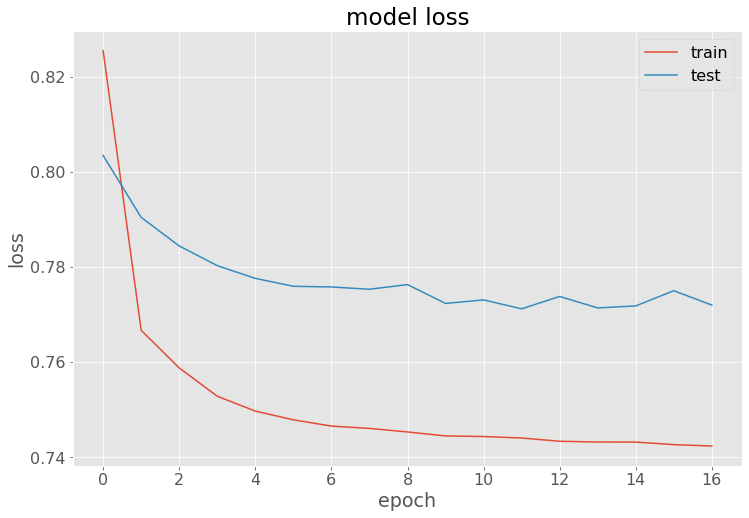

In [17]:
plt.figure(figsize=(12,8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [18]:
predictions = autoencoder.predict(X_test)

In [19]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [20]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.764009,0.001720
std,3.540601,0.041443
min,0.038986,0.000000
25%,0.243201,0.000000
50%,0.393127,0.000000
75%,0.623787,0.000000
max,260.641208,1.000000


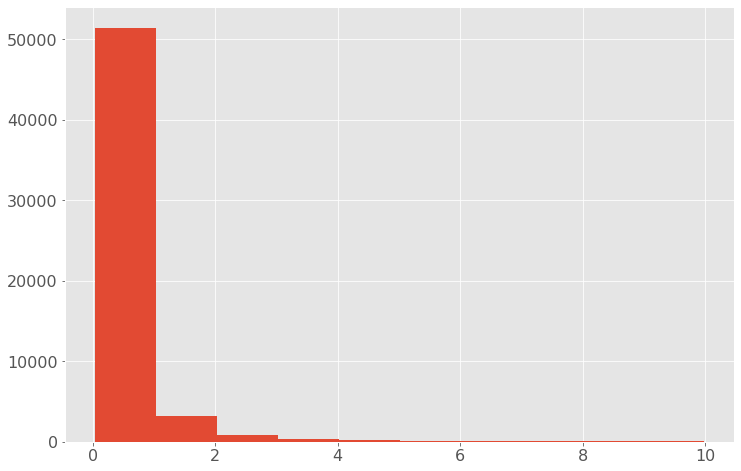

In [21]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

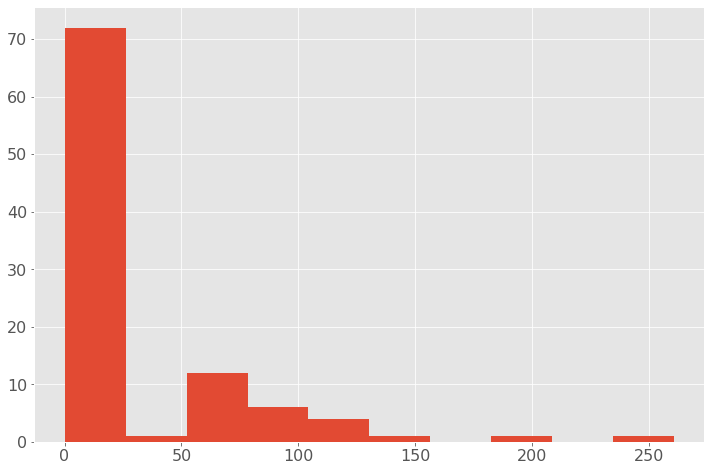

In [22]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [23]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

### How accurate our model is?

Since the data is extremely imbalanced, we need to use Area Under Curve (AUC) as the evaluation metric.

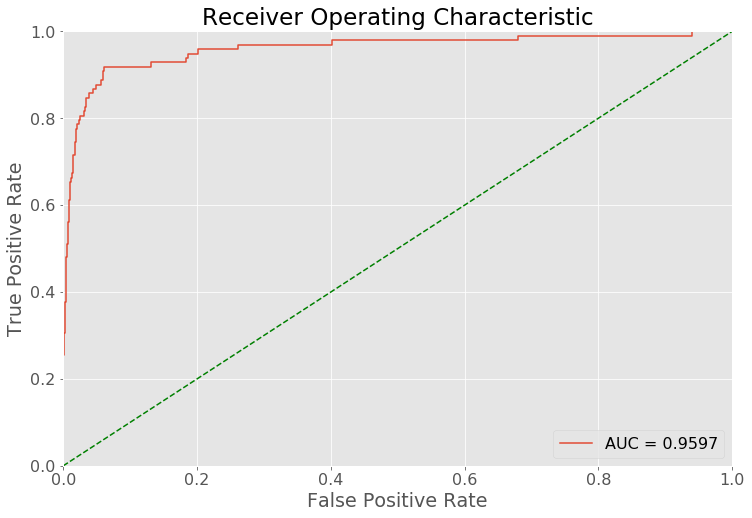

In [24]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## How is the model comparing to human judgement?

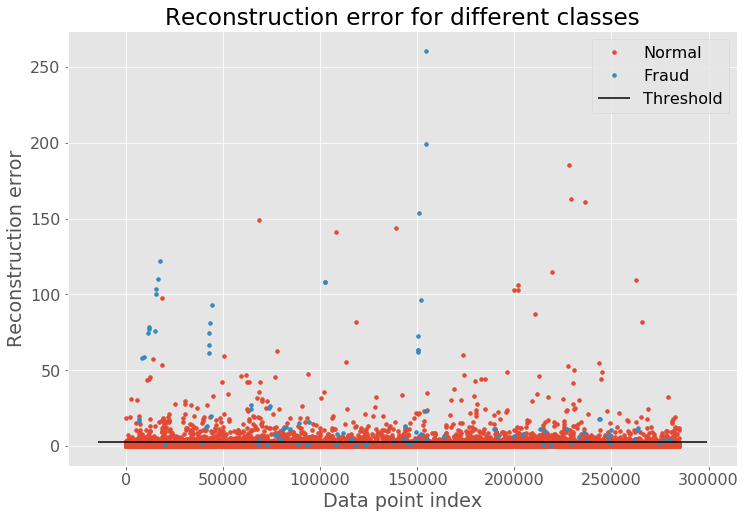

In [25]:
threshold = 2.9

groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(12,8))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="black", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

## Look at some thing traditional

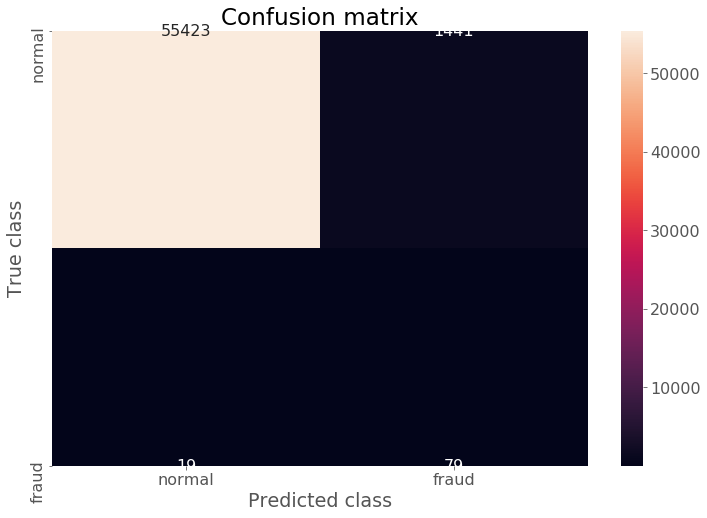

In [26]:
import seaborn as sns
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
#plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## An Improved Model

The previous model did not perform well since the model structure is too __simple__. For the purpose of improving the performances, we need to design a better model.

In [27]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [28]:
from keras.layers import RepeatVector, TimeDistributed
#input_dim = X_train_reshaped.shape[1]
encoding_dim = 32
input_layer = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
encoder = LSTM(encoding_dim, activation="relu", return_sequences=True,
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = LSTM(int(encoding_dim/2), activation="relu", return_sequences=False)(encoder)
L3 = RepeatVector(X_train_reshaped.shape[1])(encoder)
decoder = LSTM(int(encoding_dim/2), activation='relu', return_sequences=True)(L3)
decoder = LSTM(encoding_dim, activation='relu', return_sequences=True)(decoder)
output = TimeDistributed(Dense(X_train_reshaped.shape[2]))(decoder)
lstm_ae = Model(inputs=input_layer, outputs=output)


In [29]:
lstm_ae.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 29)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 32)             7936      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 16)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             2112      
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 32)             6272      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 29)             957 

In [30]:
nb_epoch = 100
batch_size = 32

lstm_ae.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

hist = lstm_ae.fit(X_train_reshaped, X_train_reshaped,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_reshaped, X_test_reshaped),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard,es]).history

Train on 227451 samples, validate on 56962 samples
Epoch 1/100
227451/227451 [==============================] - 25s 108us/step - loss: 0.5433 - accuracy: 0.5222 - val_loss: 0.3303 - val_accuracy: 0.6686
Epoch 2/100
227451/227451 [==============================] - 23s 102us/step - loss: 0.2186 - accuracy: 0.7454 - val_loss: 0.1758 - val_accuracy: 0.8198
Epoch 3/100
227451/227451 [==============================] - 23s 102us/step - loss: 0.1418 - accuracy: 0.8211 - val_loss: 0.1324 - val_accuracy: 0.8367
Epoch 4/100
227451/227451 [==============================] - 23s 103us/step - loss: 0.1068 - accuracy: 0.8427 - val_loss: 0.1059 - val_accuracy: 0.8536
Epoch 5/100
227451/227451 [==============================] - 23s 103us/step - loss: 0.0897 - accuracy: 0.8592 - val_loss: 0.1348 - val_accuracy: 0.8170
Epoch 6/100
227451/227451 [==============================] - 23s 102us/step - loss: 0.0815 - accuracy: 0.8705 - val_loss: 0.0936 - val_accuracy: 0.8732
Epoch 7/100
227451/227451 [==========

## Evaluation of the Improved Model

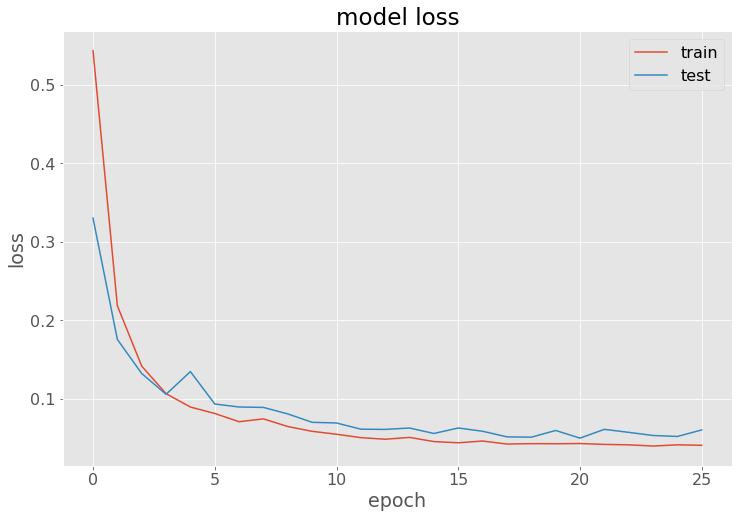

In [31]:
plt.figure(figsize=(12,8))
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [32]:
predictions = lstm_ae.predict(X_test_reshaped)
predictions = predictions.reshape(predictions.shape[0], predictions.shape[2])

In [33]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [34]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.057307,0.001720
std,1.231444,0.041443
min,0.002676,0.000000
25%,0.010343,0.000000
50%,0.018121,0.000000
75%,0.035383,0.000000
max,219.024135,1.000000


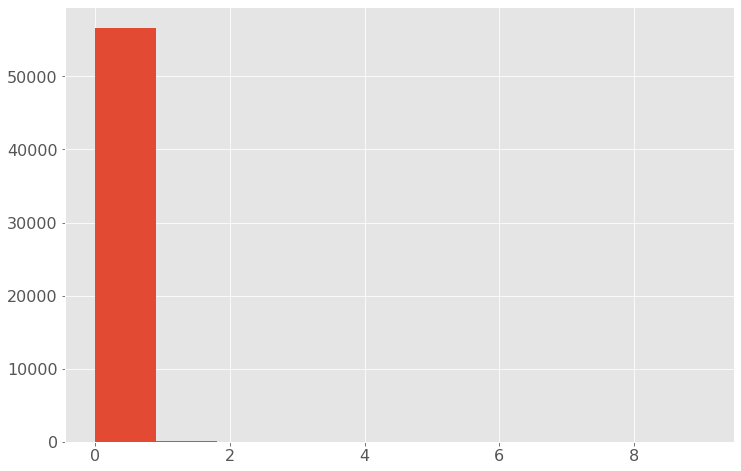

In [35]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

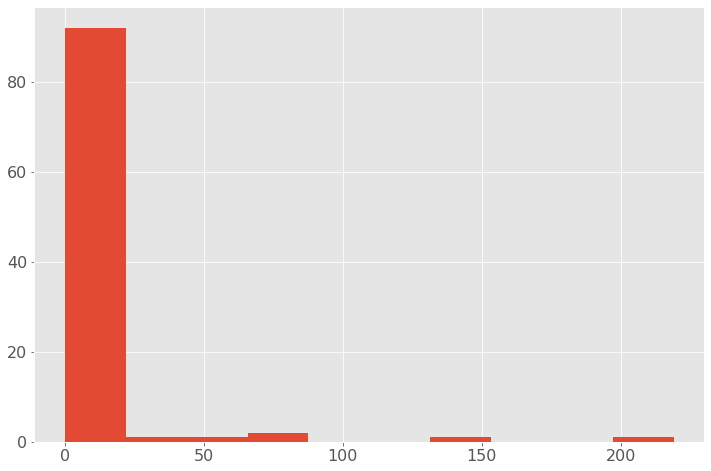

In [36]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

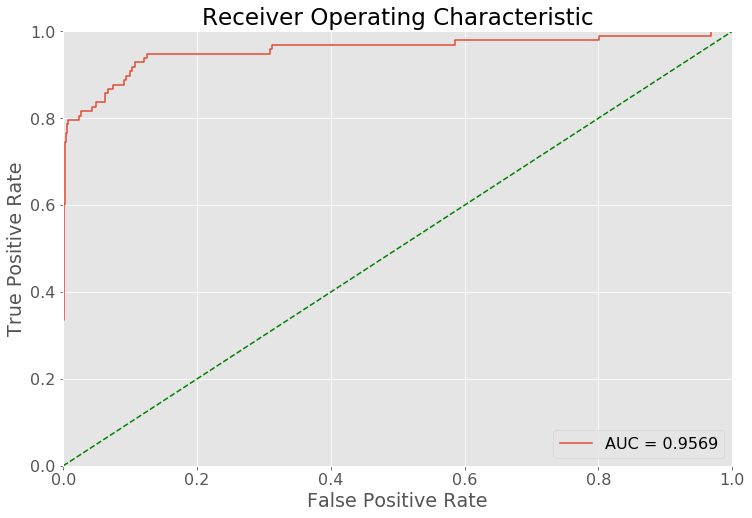

In [37]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

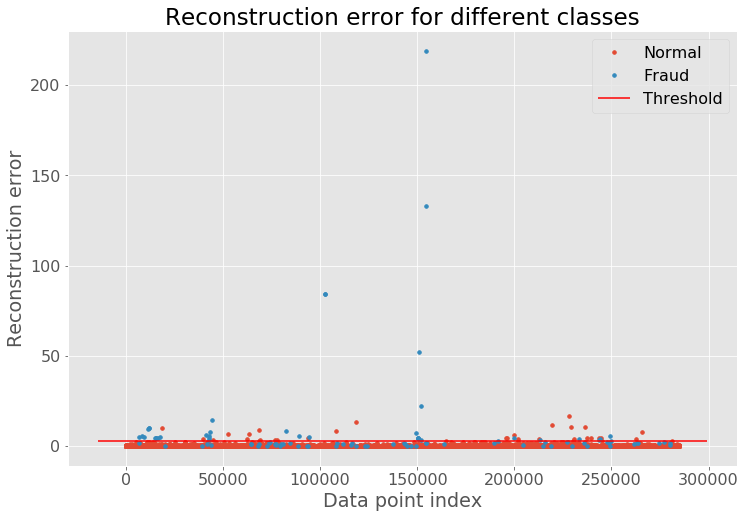

In [38]:
threshold = 2.9

groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(12,8))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

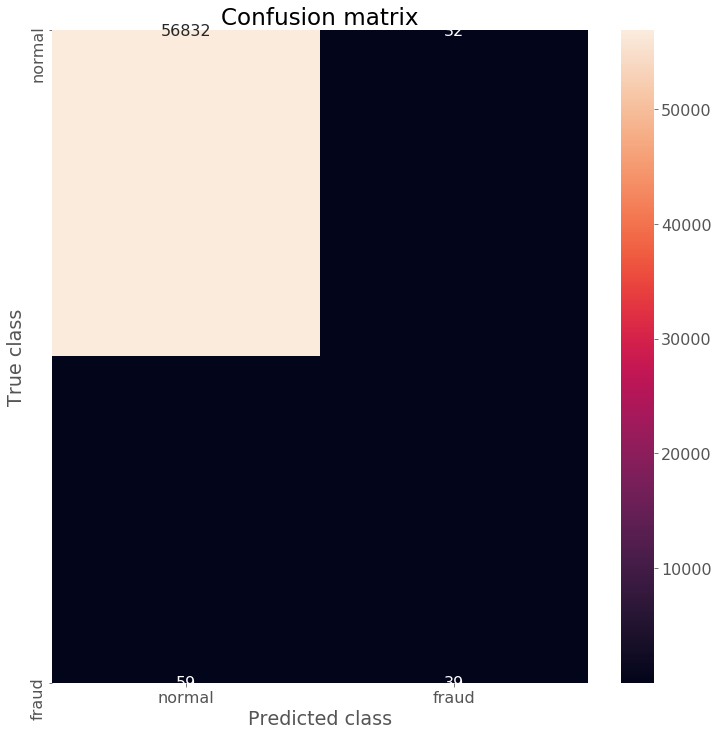

In [39]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
#plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()